## Import Required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import pickle
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Load the data into Pandas Dataframe

In [2]:
df = pd.read_csv("housing_data.csv")

In [3]:
df

,Bedrooms,Bathrooms,SquareFootage,Location,SalePrice
0,3,2.0,1800,A,250000
1,4,3.0,2200,B,320000
2,2,1.0,1200,A,180000
3,3,2.5,2000,C,280000
4,4,2.5,2400,B,350000
...,...,...,...,...,...
62,4,3.0,2300,C,330000
63,3,2.5,2100,A,290000
64,1,1.0,900,B,150000
65,2,1.5,1200,C,170000


## Basic Analysis on the data

In [4]:
df.describe()

,Bedrooms,Bathrooms,SquareFootage,SalePrice
count,67.000000,67.000000,67.000000,67.000000
mean,2.820896,2.044776,1749.253731,253432.835821
std,0.936230,0.689375,504.937180,65007.044812
min,1.000000,1.000000,900.000000,150000.000000
25%,2.000000,1.500000,1200.000000,190000.000000
50%,3.000000,2.000000,1900.000000,260000.000000
75%,4.000000,2.500000,2200.000000,320000.000000
max,4.000000,3.000000,2400.000000,350000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        67 non-null     int64  
 1    Bathrooms      67 non-null     float64
 2    SquareFootage  67 non-null     int64  
 3    Location       67 non-null     object 
 4    SalePrice      67 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df[" Location"].value_counts()

 A    23
 B    22
 C    22
Name:  Location, dtype: int64

In [7]:
df.isnull().sum()

Bedrooms          0
 Bathrooms        0
 SquareFootage    0
 Location         0
 SalePrice        0
dtype: int64

In [8]:
print("Number of Duplicates" ,len(df[df.duplicated()])) 

Number of Duplicates 41


In [9]:
# write a function to visualize the outliers in the dataset
def plot_outliers(df, col):
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    for i in range(90,101):
        print("{}th percenile value of Bedrooms count: {}".format(i,np.percentile(df[col].values,i)))
    outlier_item_cnt = np.percentile(df[col].values,100)

90th percenile value of Bedrooms count: 4.0
91th percenile value of Bedrooms count: 4.0
92th percenile value of Bedrooms count: 4.0
93th percenile value of Bedrooms count: 4.0
94th percenile value of Bedrooms count: 4.0
95th percenile value of Bedrooms count: 4.0
96th percenile value of Bedrooms count: 4.0
97th percenile value of Bedrooms count: 4.0
98th percenile value of Bedrooms count: 4.0
99th percenile value of Bedrooms count: 4.0
100th percenile value of Bedrooms count: 4.0
--------------------------------------------------
90th percenile value of Bedrooms count: 3.0
91th percenile value of Bedrooms count: 3.0
92th percenile value of Bedrooms count: 3.0
93th percenile value of Bedrooms count: 3.0
94th percenile value of Bedrooms count: 3.0
95th percenile value of Bedrooms count: 3.0
96th percenile value of Bedrooms count: 3.0
97th percenile value of Bedrooms count: 3.0
98th percenile value of Bedrooms count: 3.0
99th percenile value of Bedrooms count: 3.0
100th percenile value of

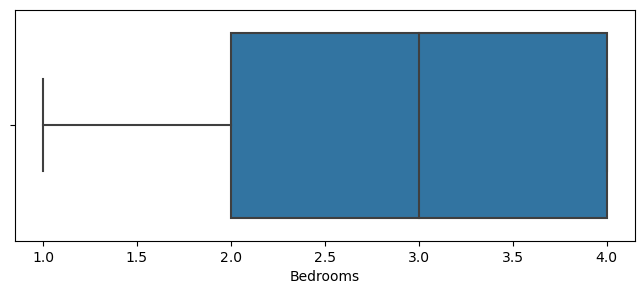

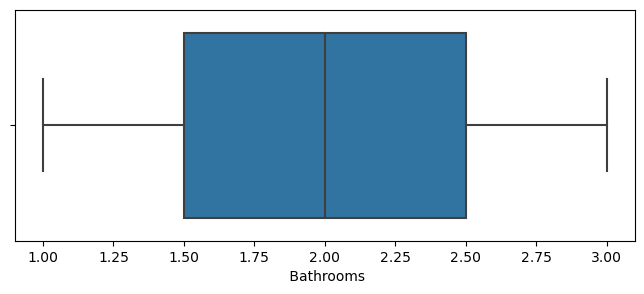

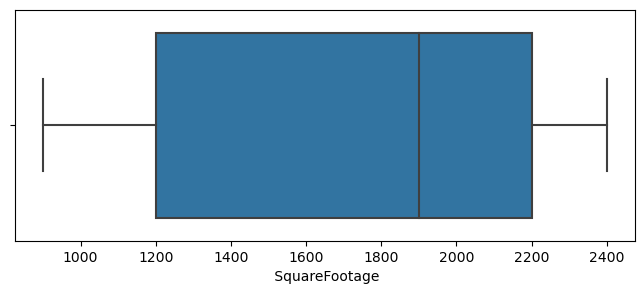

<Figure size 800x300 with 0 Axes>

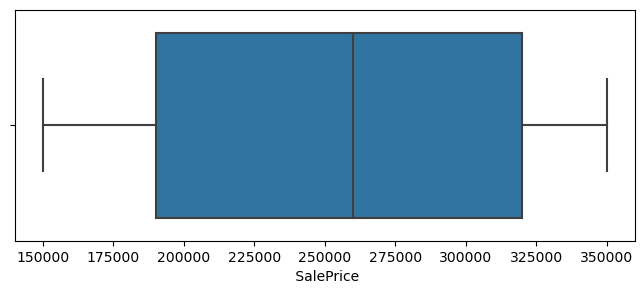

In [10]:
# visualize the outliers using the 'plot_outliers' function
for i in df.columns:
    try:
        plot_outliers(df, i)
        print("-"*50)
    except:
        continue

## Preprocess the dataset

In [11]:
# split the data into the train and test datasets
X = df.drop([" SalePrice"], axis = 1)
y = df[" SalePrice"]
X_train, y_train = X[:50], y[:50]
X_test, y_test = X[50:], y[50:]

In [12]:
# Normalize the Dataset
scaler = MinMaxScaler()
for col in tqdm(X_train.columns[:-1]):
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1)) # we fit the scaler only using the training data
    
# label encode the Locations   
vec = LabelEncoder()
X_train[" Location"] = vec.fit_transform(X_train[" Location"])
X_test[" Location"] = vec.transform(X_test[" Location"])


  0%|          | 0/3 [00:00<?, ?it/s]

## Model Traning

### ALGO: Lasso Regression

In [13]:
alpha = [10**i for i in range(-6,6)]


train_score = []
val_score = []
for i in tqdm(alpha):
    
    print("alpha = {} ".format(i))
    _model = Lasso(alpha= i)
    _model.fit(X_train, y_train)
    rmse_train = mean_squared_error(_model.predict(X_train), y_train, squared=False)
    rmse_val = mean_squared_error(_model.predict(X_test), y_test, squared=False)
    
    # auto-saving the model with the less RMSE 
    if val_score:
        if sorted(val_score)[0] > rmse_val:
            print("model saving.....")
            with open('best_lasso','wb') as loc:
                pickle.dump(_model, loc)
    else:
        print("model saving.....")
        with open('best_lasso', 'wb') as loc:
            pickle.dump(_model, loc)

    train_score.append(rmse_train)
    val_score.append(rmse_val)
    print("Training Loss is {} ".format(rmse_train))
    print("Validation Loss is {} ".format(rmse_val))
    print("-"*50)
    
with open('lasso_log','wb') as loc:
    pickle.dump((train_score,val_score,alpha),loc)

  0%|          | 0/12 [00:00<?, ?it/s]

alpha = 1e-06 
model saving.....
Training Loss is 10287.978462816862 
Validation Loss is 11003.197429790325 
--------------------------------------------------
alpha = 1e-05 
model saving.....
Training Loss is 10287.978462816862 
Validation Loss is 11003.197428345076 
--------------------------------------------------
alpha = 0.0001 
model saving.....
Training Loss is 10287.978462817056 
Validation Loss is 11003.197420577551 
--------------------------------------------------
alpha = 0.001 
Training Loss is 10287.978462847197 
Validation Loss is 11003.198375787768 
--------------------------------------------------
alpha = 0.01 
model saving.....
Training Loss is 10287.978462920199 
Validation Loss is 11003.192762659162 
--------------------------------------------------
alpha = 0.1 
model saving.....
Training Loss is 10287.97854821907 
Validation Loss is 11003.166672963915 
--------------------------------------------------
alpha = 1 
model saving.....
Training Loss is 10287.992937924

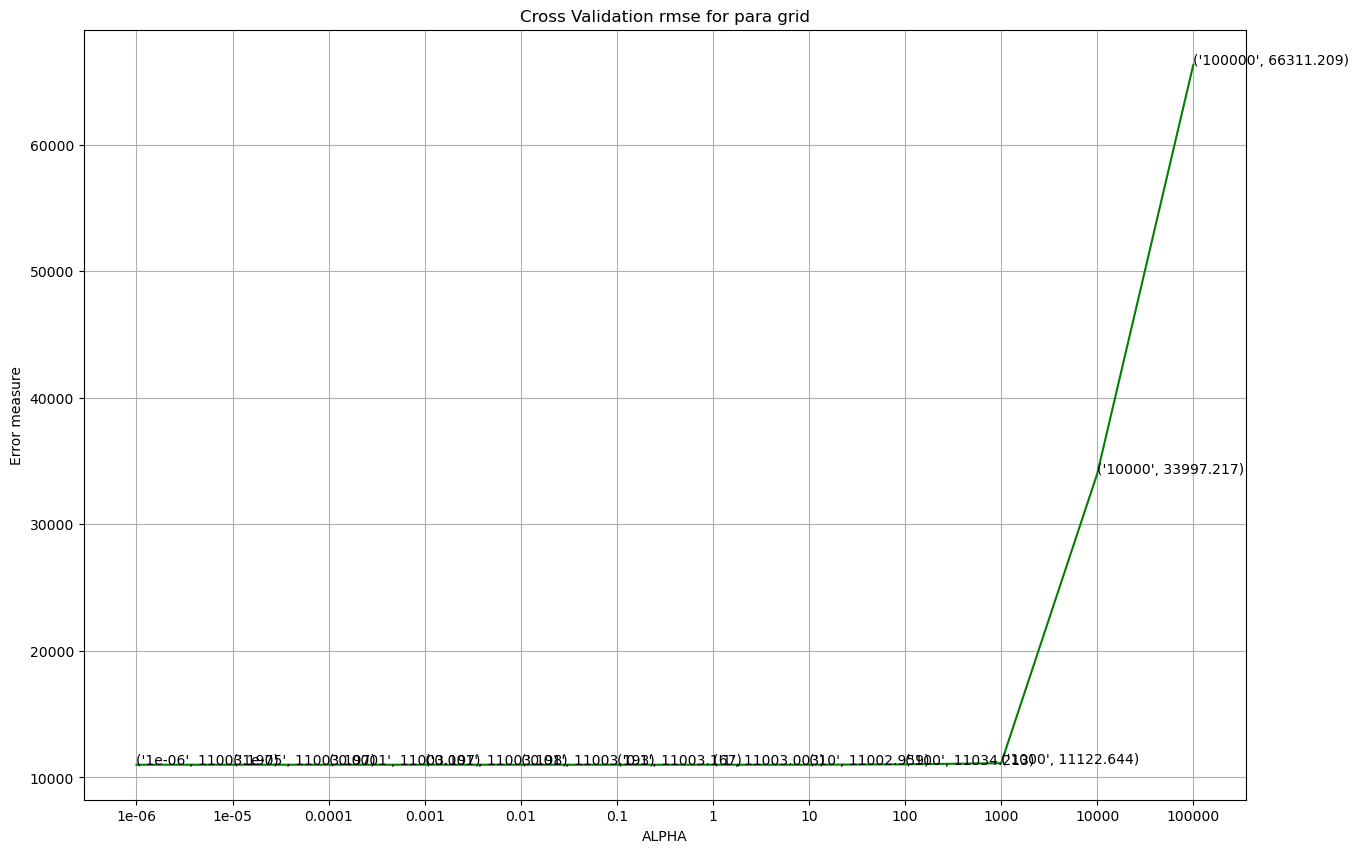

In [14]:
params = [str(i) for i in alpha]
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(params, val_score,c='g')
for i, txt in enumerate(np.round(val_score,3)):
    ax.annotate((params[i],np.round(txt,3)), (params[i],val_score[i]))
plt.grid()
plt.title("Cross Validation rmse for para grid")
plt.xlabel("ALPHA")
plt.ylabel("Error measure")
plt.show()

## Evaluate the result

In [15]:
# Import the best performing model
with open('best_lasso','rb') as loc:
    best_lasso = pickle.load(loc)

In [16]:
# Calculate RMSE on test dataset
mean_squared_error(best_lasso.predict(X_train), y_train, squared=False)

10289.7303142742